# Deep Learning para Series de Tiempo

Resolver un problema de predicción de series de tiempo para predecir las mascotas que recibirá un refugio de animales domésticos. Dividir entre perros y gatos.

**Estudiante:** Micaela Del Longo

**Dataset:** https://www.kaggle.com/datasets/jinbonnie/animal-data

**Dataset Original:** https://data.bloomington.in.gov/Public-Works/Animal-Shelter-Animals/e245-r9ub/about_data

In [60]:
import pandas as pd
import helper
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

# Análisis Exploratorio de Datos (Más o Menos)

In [2]:
# cargamos el dataset
df = pd.read_csv('micaela_data/Animal_Shelter.csv')
# renombramos las columnas para que tengan un formato más amigable
df = df.rename(
	columns={
		'id': 'ID',
		'intakedate': 'Intake Date',
		'intakereason': 'Intake Reason',
		'istransfer': 'Is Transfer',
		'sheltercode': 'Shelter Code',
		'identichipnumber': 'Identi Chip Number',
		'animalname': 'Animal Name',
		'breedname': 'Breed Name',
		'basecolour': 'Base Colour',
		'speciesname': 'Species Name',
		'animalage': 'Animal Age',
		'sexname': 'Sex Name',
		'location': 'Location',
		'movementdate': 'Movement Date',
		'movementtype': 'Movement Type',
		'istrial': 'Is Trial',
		'returndate': 'Return Date',
		'returnedreason': 'Returned Reason',
		'deceaseddate': 'Deceased Date',
		'deceasedreason': 'Deceased Reason',
		'diedoffshelter': 'Died Off Shelter',
		'puttosleep': 'Put to Sleep',
		'isdoa': 'Is DOA'
	}
)

In [3]:
print("Primeras 15 Filas del Dataset\n")
df.head(15)

Primeras 15 Filas del Dataset



,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Movement Date,Movement Type,Is Trial,Return Date,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,05/13/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,04/24/2017 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,04/15/2017 12:00:00 AM,Adoption,False,02/28/2020 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,02/29/2020 12:00:00 AM,Reclaimed,False,11/06/2023 12:00:00 AM,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,12/17/2023 12:00:00 AM,Adoption,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,NaN,NaN,False,NaN,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,04/18/2017 12:00:00 AM,Foster,False,05/29/2018 12:00:00 AM,Stray,NaN,Died in care,False,False,False
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,05/29/2018 12:00:00 AM,Adoption,False,NaN,Stray,NaN,Died in care,False,False,False
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,03/30/2013 12:00:00 AM,Adoption,False,05/08/2017 12:00:00 AM,Incompatible with owner lifestyle,NaN,Died in care,False,False,False


In [4]:
print("Tipos de Datos")
print(df.dtypes)

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df.shape[0], df.shape[1]))

print("Duplicados: %d" % df.duplicated().sum())


Tipos de Datos
ID                     int64
Intake Date           object
Intake Reason         object
Is Transfer             bool
Shelter Code          object
Identi Chip Number    object
Animal Name           object
Breed Name            object
Base Colour           object
Species Name          object
Animal Age            object
Sex Name              object
Location              object
Movement Date         object
Movement Type         object
Is Trial                bool
Return Date           object
Returned Reason       object
Deceased Date         object
Deceased Reason       object
Died Off Shelter        bool
Put to Sleep            bool
Is DOA                  bool
dtype: object

Cantidad de Filas: 36613
Cantidad de Columnas: 23

Duplicados: 3645


## Descripción de las Columnas

| Columna            | Descripción                                              |
|--------------------|----------------------------------------------------------|
| ID                 | ID del animal en el refugio                              |
| Intake Date        | Fecha en la que ingresó el animal por 1ra vez al refugio |
| Intake Reason      | Razón de ingreso del animal al refugio                   |
| Is Transfer        | Si el animal fue transferido a el refugio                |
| Shelter Code       | Código del refugio                                       |
| Identi Chip Number | Número de identificación del animal                      |
| Animal Name        | Nombre del animal                                        |
| Breed Name         | Raza del animal                                          |
| Base Colour        | Color del animal                                         |
| Species Name       | Especie del animal                                       |
| Animal Age         | Edad del animal                                          |
| Sex Name           | Sexo del animal                                          |
| Location           | Ubicación del animal                                     |
| Movement Date      | Fecha de movimiento afuera del refugio del animal        |
| Movement Type      | Tipo de movimiento                                       |
| Is Trial           | Si el animal está en prueba                              |
| Return Date        | Fecha de retorno del animal al refugio                   |
| Returned Reason    | Razón de retorno                                         |
| Deceased Date      | Fecha de fallecimiento del animal                        |
| Deceased Reason    | Razón de fallecimiento                                   |
| Died Off Shelter   | Si el animal murió fuera del refugio                     |
| Put to Sleep       | Si el animal fue sacrificado                             |
| Is DOA             | Si el animal llegó muerto al refugio                     |

# Preprocesamiento de Datos

In [5]:
# eliminar todas las filas que no sean perros o gatos
df_filtered = df[df['Species Name'].isin(['Dog', 'Cat'])].copy()

# convertir las fechas a formato datetime
df_filtered['Intake DateTime'] = pd.to_datetime(df_filtered['Intake Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Movement DateTime'] = pd.to_datetime(df_filtered['Movement Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Return DateTime'] = pd.to_datetime(df_filtered['Return Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date
df_filtered['Deceased DateTime'] = pd.to_datetime(df_filtered['Deceased Date'], format='%m/%d/%Y %I:%M:%S %p').dt.date

print("\nCantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_filtered.shape[0], df_filtered.shape[1]))

df_filtered.head(10)


Cantidad de Filas: 35158
Cantidad de Columnas: 27



,ID,Intake Date,Intake Reason,Is Transfer,Shelter Code,Identi Chip Number,Animal Name,Breed Name,Base Colour,Species Name,...,Returned Reason,Deceased Date,Deceased Reason,Died Off Shelter,Put to Sleep,Is DOA,Intake DateTime,Movement DateTime,Return DateTime,Deceased DateTime
0,15801,11/28/2009 12:00:00 AM,Moving,False,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2009-11-28,2017-05-13,NaT,NaT
1,15932,12/08/2009 12:00:00 AM,Moving,False,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,Stray,NaN,Died in care,False,False,False,2009-12-08,2017-04-24,NaT,NaT
2,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2017-04-15,2020-02-28,2024-06-28
3,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2020-02-29,2023-11-06,2024-06-28
4,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,2023-12-17,NaT,2024-06-28
5,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
6,28859,08/10/2012 12:00:00 AM,Abandoned,False,D23111515,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Black and Tan,Dog,...,Stray,06/28/2024 12:00:00 AM,Court Order/ Legal,True,False,False,2012-08-10,NaT,NaT,2024-06-28
7,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2017-04-18,2018-05-29,NaT
8,30812,01/11/2013 12:00:00 AM,Abandoned,False,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,Stray,NaN,Died in care,False,False,False,2013-01-11,2018-05-29,NaT,NaT
9,31469,03/26/2013 12:00:00 AM,Incompatible with owner lifestyle,False,D1303720,981020007006095,Bonnie,Basenji/Mix,Brown and White,Dog,...,Incompatible with owner lifestyle,NaN,Died in care,False,False,False,2013-03-26,2013-03-30,2017-05-08,NaT


In [6]:
# Para tener una idea de la cantidad de fechas únicas en cada columna
print("Cantidad de Intake DateTimes Únicos: %d" % len(df_filtered['Intake DateTime'].unique()))
print("Cantidad de Movement DateTimes Únicos: %d" % len(df_filtered['Movement DateTime'].unique()))
print("Cantidad de Return DateTimes Únicos: %d" % len(df_filtered['Return DateTime'].unique()))
print("Cantidad de Deceased DateTimes Únicos: %d" % len(df_filtered['Deceased DateTime'].unique()))

Cantidad de Intake DateTimes Únicos: 2604
Cantidad de Movement DateTimes Únicos: 2648
Cantidad de Return DateTimes Únicos: 2386
Cantidad de Deceased DateTimes Únicos: 566


## Transformación del DataSet

In [7]:
df_grouped = helper.transform_data(df_filtered)
df_grouped.head(10)

# Visualización de Datos

In [9]:
df_grouped.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,2745.00000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000,2745.000000
mean,4.15592,2.563570,6.636066,3.895082,2.603279,1.409107,0.158106,0.092896
std,4.23814,2.664771,5.842298,2.959874,3.271318,1.680966,0.459505,0.315600
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.00000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.00000,2.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,6.00000,4.000000,9.000000,5.000000,4.000000,2.000000,0.000000,0.000000
max,30.00000,57.000000,74.000000,28.000000,35.000000,15.000000,6.000000,3.000000


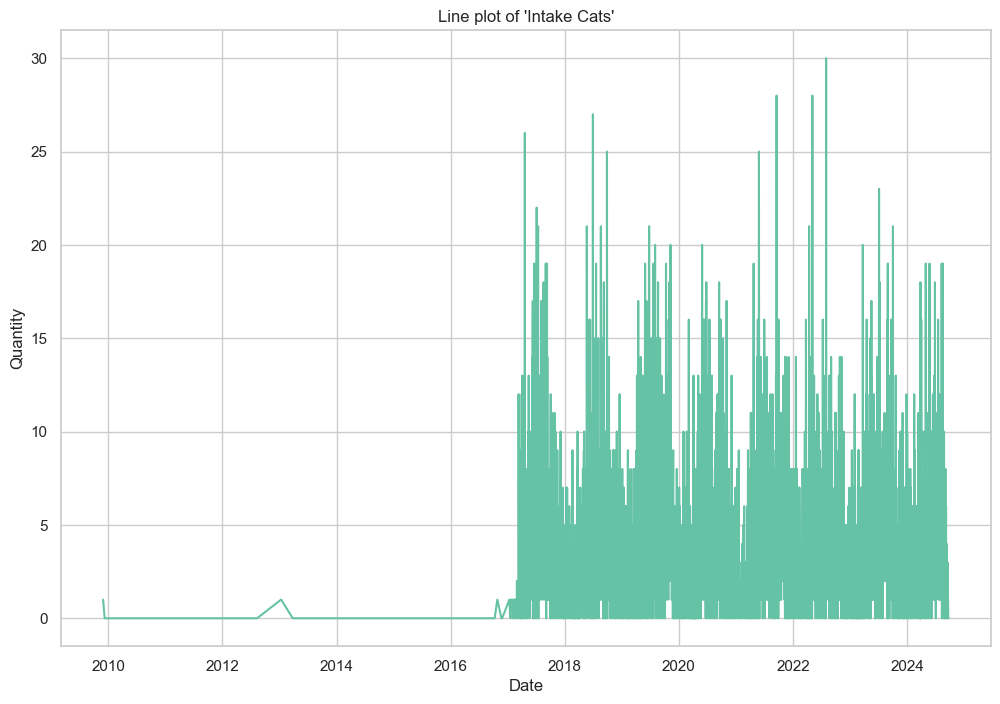

In [10]:
# Gatos ingresados al refugio
helper.plot_category(df_grouped, 'Intake Cats', "Line plot of 'Intake Cats'")

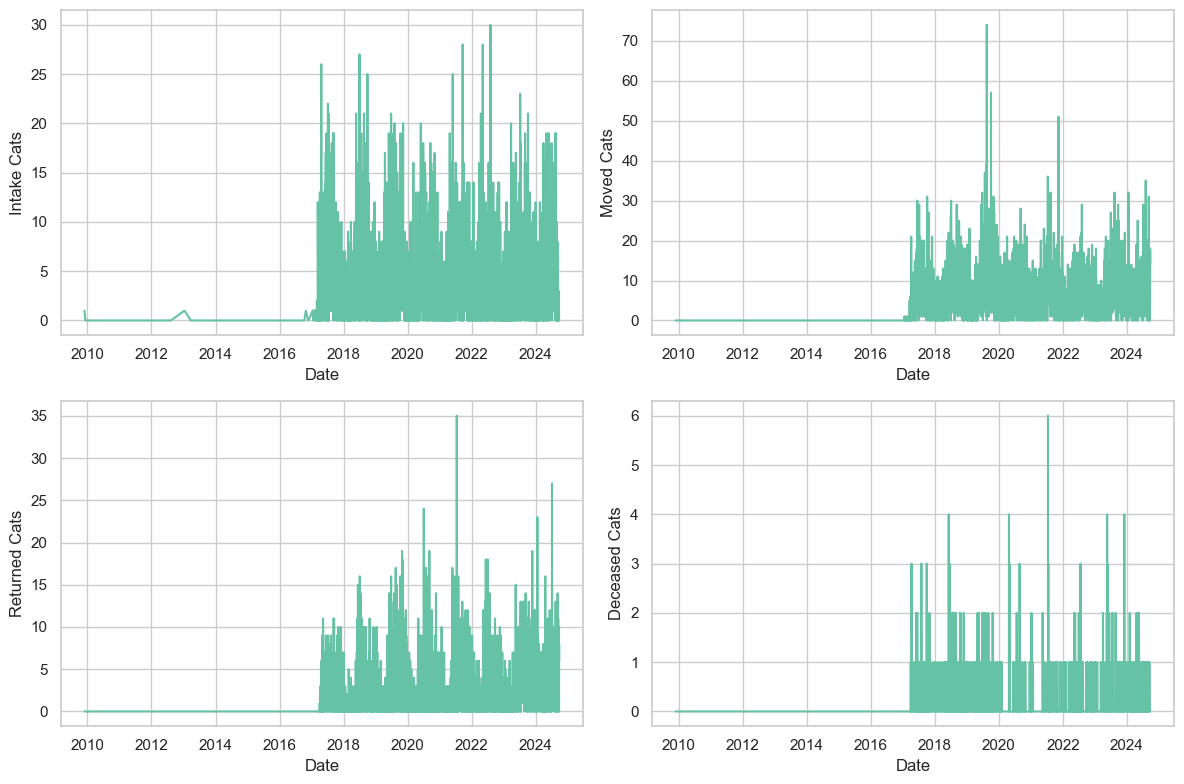

In [11]:
# Gatos ingresados/trasladados/retornados/fallecidos
helper.plot_cat_categories(df_grouped)

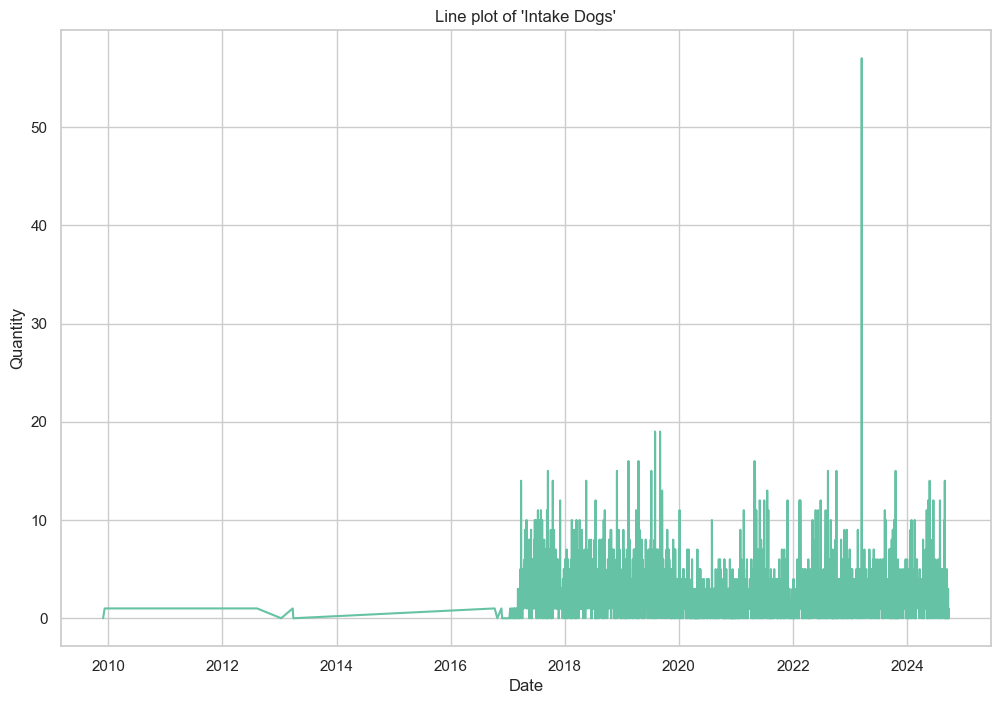

In [12]:
# Perros ingresados al refugio
helper.plot_category(df_grouped, 'Intake Dogs', "Line plot of 'Intake Dogs'")

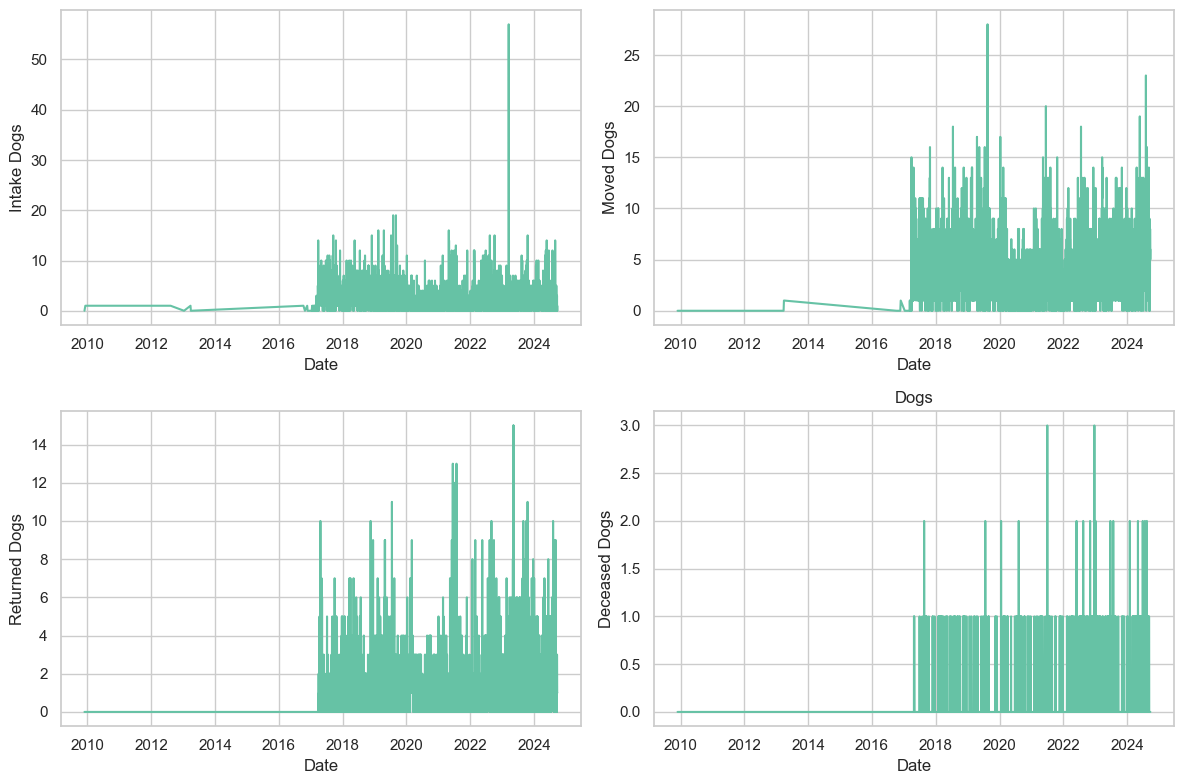

In [13]:
# Perros ingresados/trasladados/retornados/fallecidos
helper.plot_dog_categories(df_grouped)

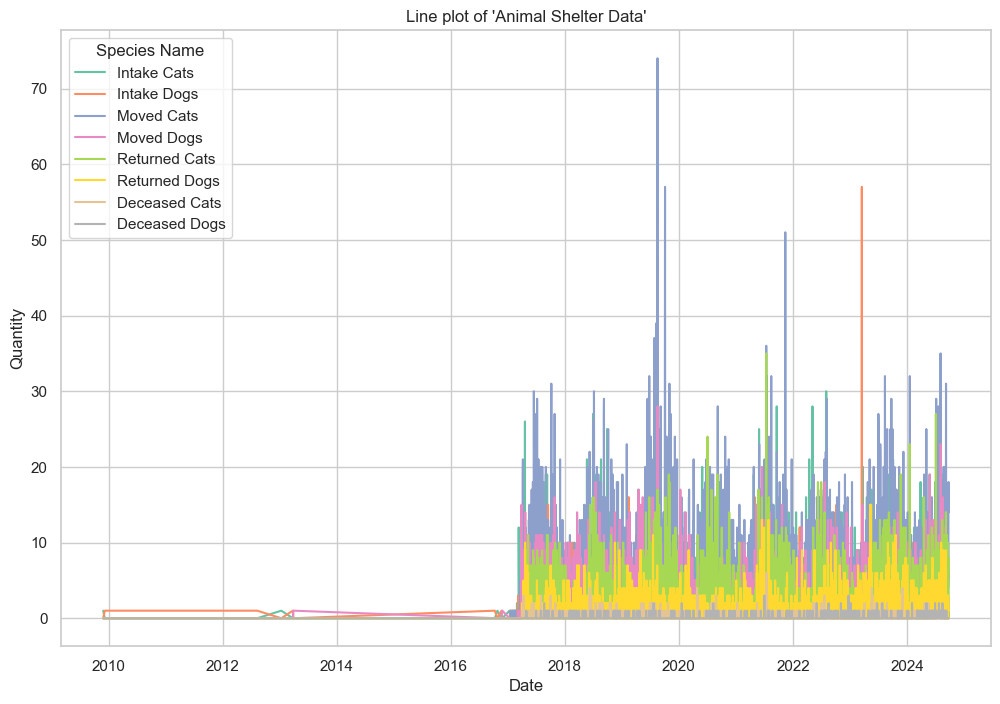

In [14]:
# Todas las categorías
helper.plot_series(df_grouped, "Line plot of 'Animal Shelter Data'")

## Tomando Intervalos de Tiempo

### Diario

In [15]:
df_daily = df_grouped.resample('D').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily.shape[0], df_daily.shape[1]))
df_daily.tail(10)

Cantidad de Filas: 5414
Cantidad de Columnas: 8



Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2024-09-14,0.0,0.0,16.0,8.0,5.0,3.0,0.0,0.0
2024-09-15,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
2024-09-16,3.0,2.0,7.0,2.0,4.0,2.0,0.0,0.0
2024-09-17,1.0,0.0,10.0,2.0,10.0,0.0,0.0,0.0
2024-09-18,1.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0
2024-09-19,1.0,2.0,10.0,3.0,6.0,0.0,0.0,0.0
2024-09-20,1.0,3.0,4.0,8.0,2.0,3.0,0.0,0.0
2024-09-21,0.0,0.0,8.0,5.0,0.0,1.0,0.0,0.0
2024-09-22,0.0,1.0,18.0,5.0,8.0,1.0,0.0,0.0


In [16]:
df_daily.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000,5414.000000
mean,2.107130,1.299778,3.364610,1.974880,1.319911,0.714444,0.080163,0.047100
std,3.663771,2.289683,5.320892,2.869493,2.668172,1.388808,0.336578,0.229454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,5.000000,3.000000,1.000000,1.000000,0.000000,0.000000
max,30.000000,57.000000,74.000000,28.000000,35.000000,15.000000,6.000000,3.000000


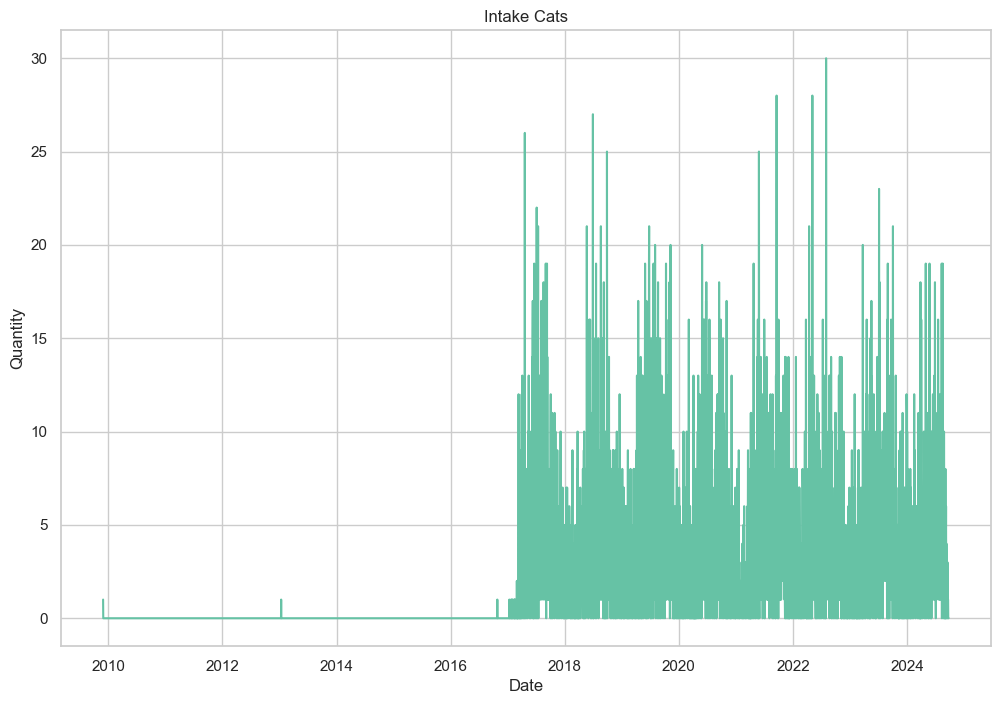

In [17]:
helper.plot_category(df_daily, 'Intake Cats', 'Intake Cats')

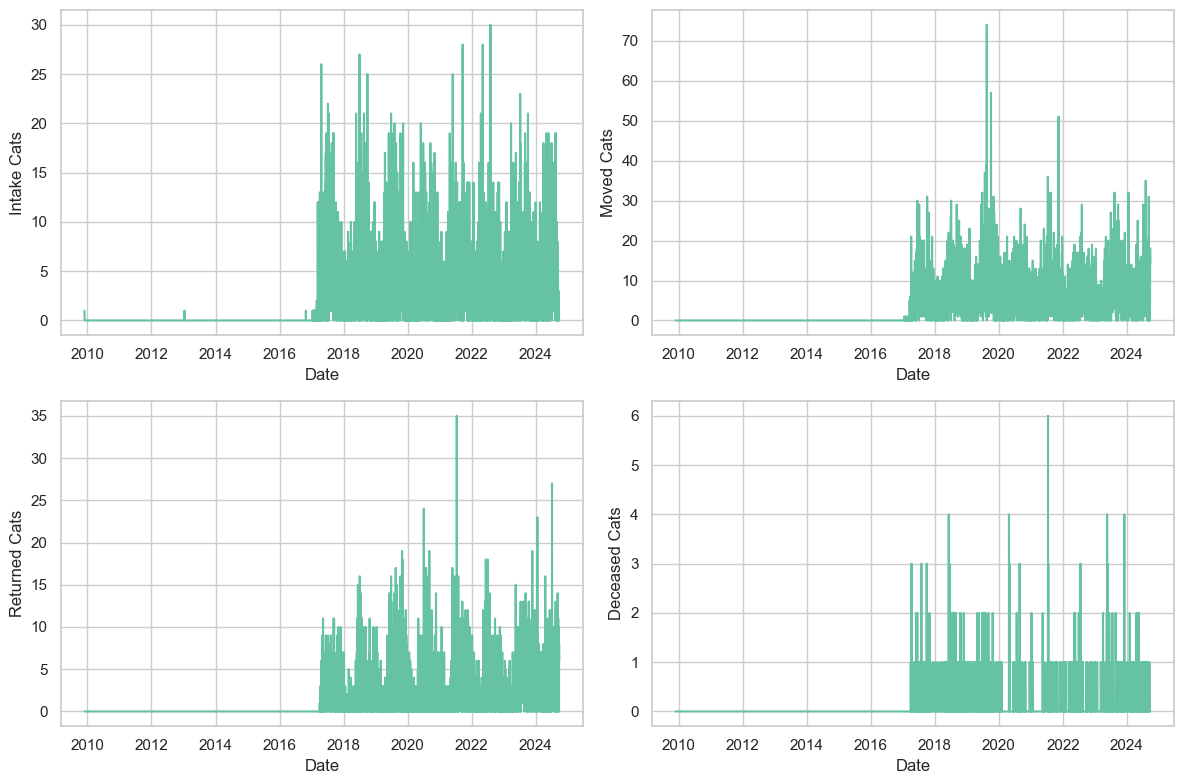

In [18]:
helper.plot_cat_categories(df_daily)

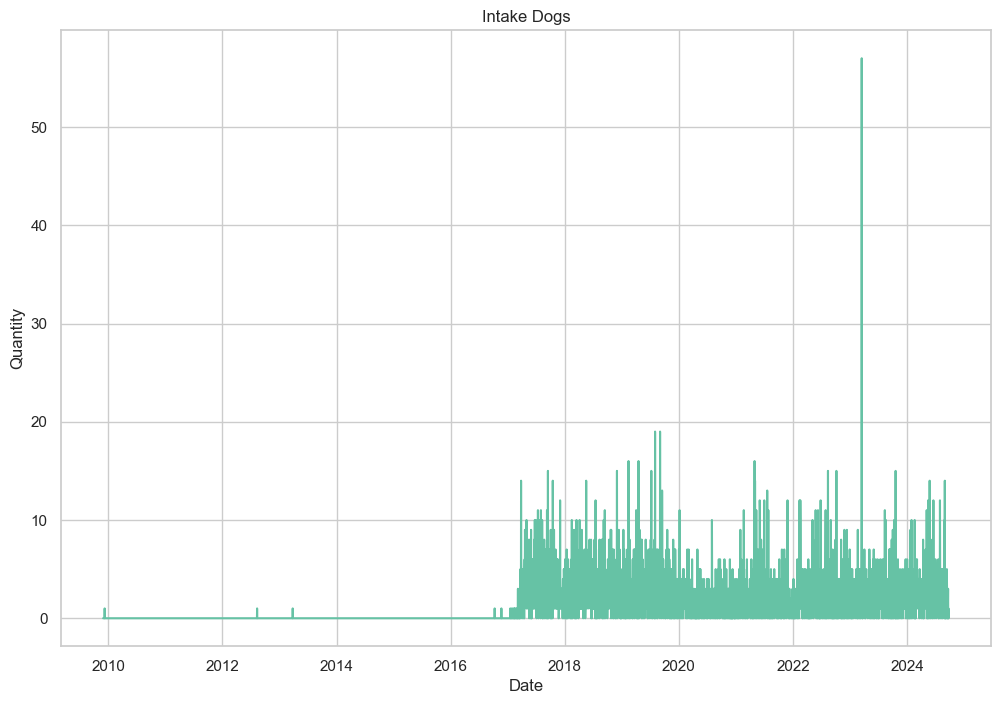

In [19]:
helper.plot_category(df_daily, 'Intake Dogs', 'Intake Dogs')

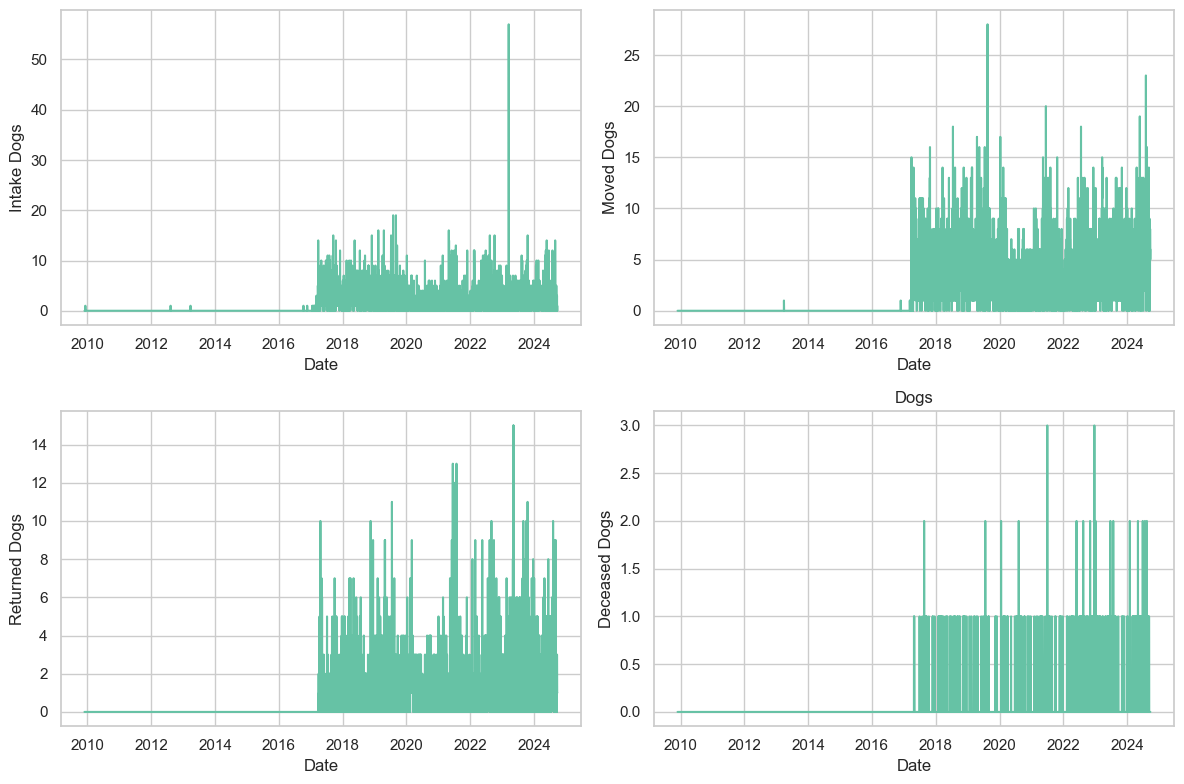

In [20]:
helper.plot_dog_categories(df_daily)

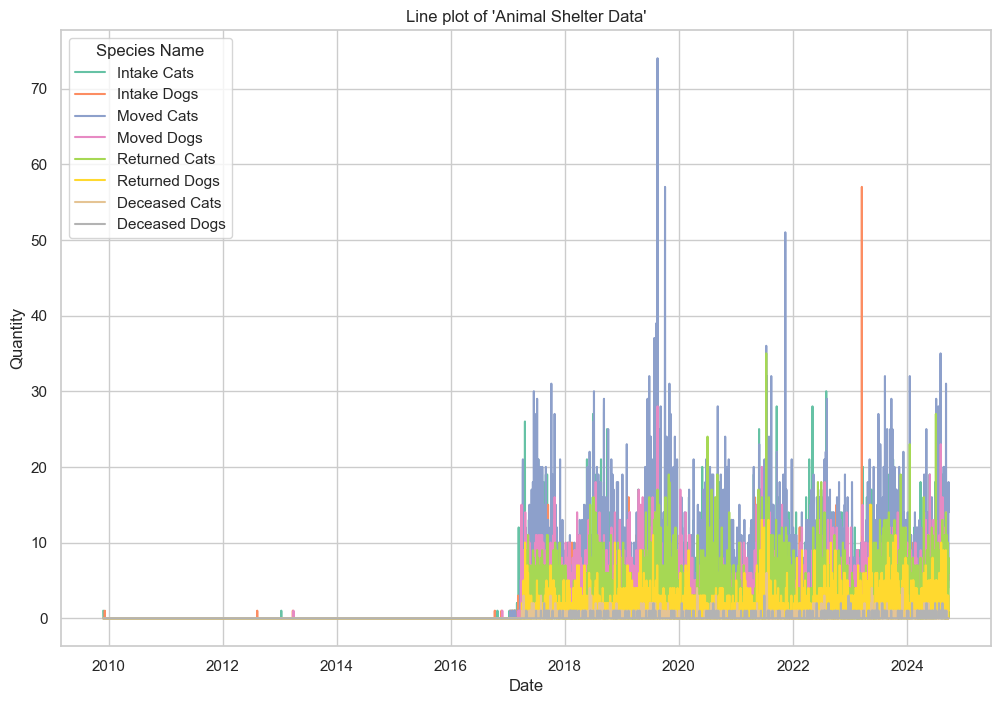

In [21]:
helper.plot_series(df_daily, "Line plot of 'Animal Shelter Data'")

### Semanal

In [22]:
# Resample the DataFrame to 3-month intervals and sum the values
df_weekly = df_grouped.resample('W').sum()
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_weekly.shape[0], df_weekly.shape[1]))
df_weekly.head(10)

Cantidad de Filas: 775
Cantidad de Columnas: 8



Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
Date,,,,,,,,
2009-11-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_weekly.describe()

Species Name,Intake Cats,Intake Dogs,Moved Cats,Moved Dogs,Returned Cats,Returned Dogs,Deceased Cats,Deceased Dogs
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,14.720000,9.080000,23.504516,13.796129,9.220645,4.990968,0.560000,0.329032
std,17.584063,10.528234,27.304336,15.149632,12.026095,6.216064,1.154119,0.709020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,6.000000,13.000000,8.000000,1.000000,1.000000,0.000000,0.000000
75%,27.000000,17.000000,44.000000,28.000000,17.000000,9.000000,1.000000,0.000000
max,87.000000,80.000000,127.000000,74.000000,56.000000,35.000000,10.000000,4.000000


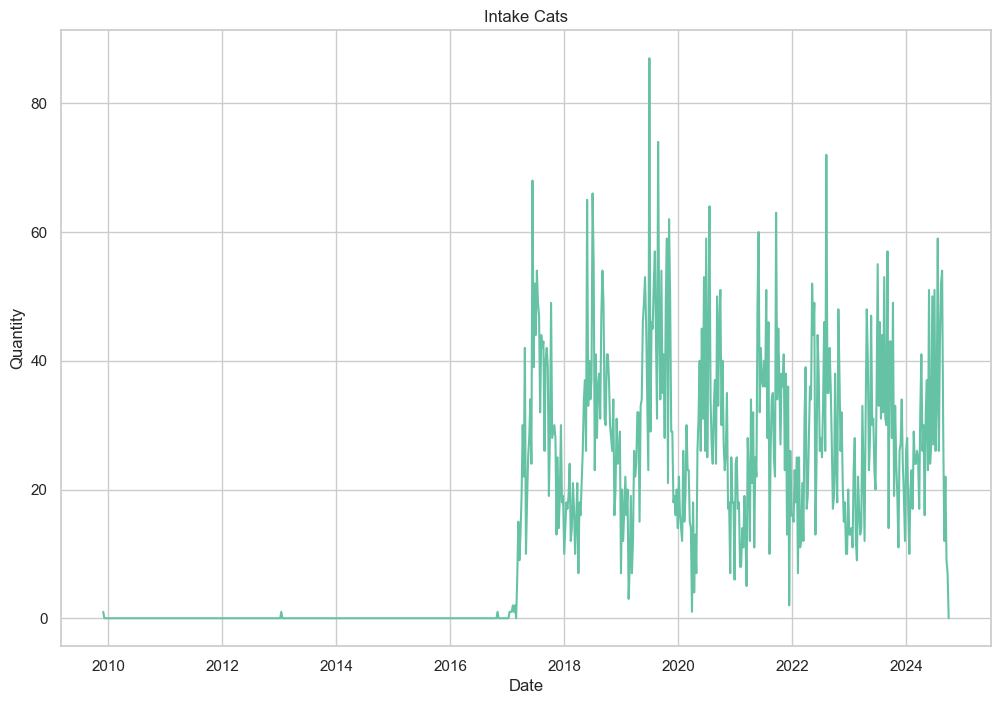

In [24]:
helper.plot_category(df_weekly, 'Intake Cats', 'Intake Cats')

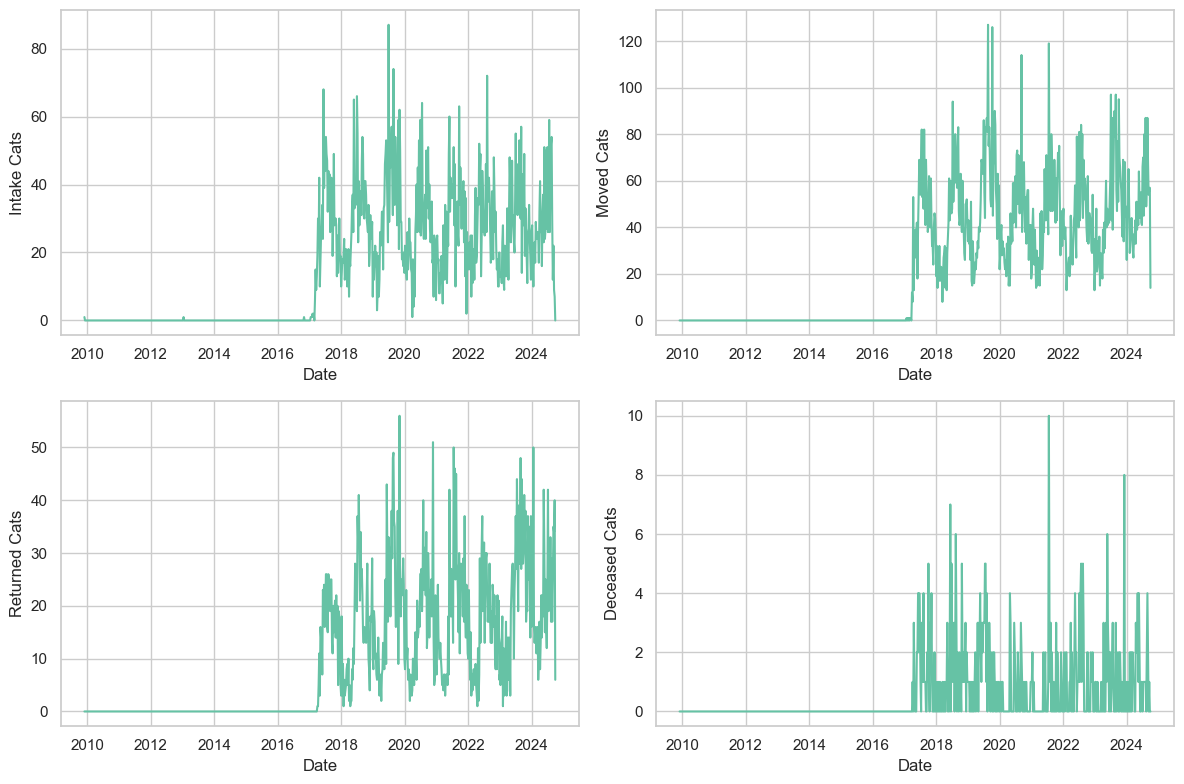

In [25]:
helper.plot_cat_categories(df_weekly)

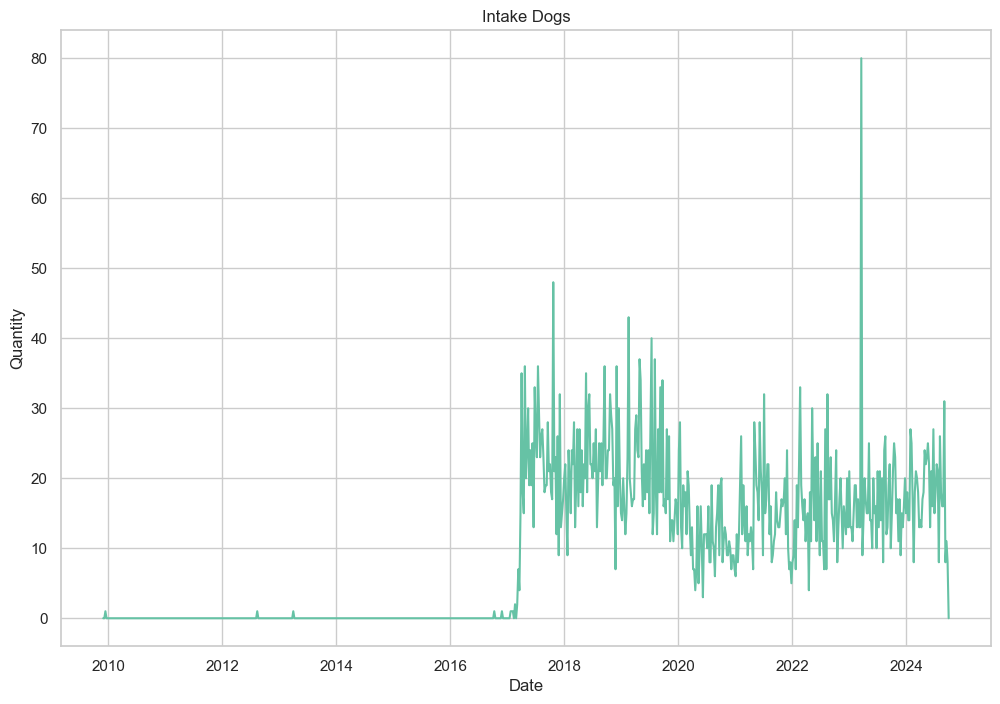

In [26]:
helper.plot_category(df_weekly, 'Intake Dogs', 'Intake Dogs')

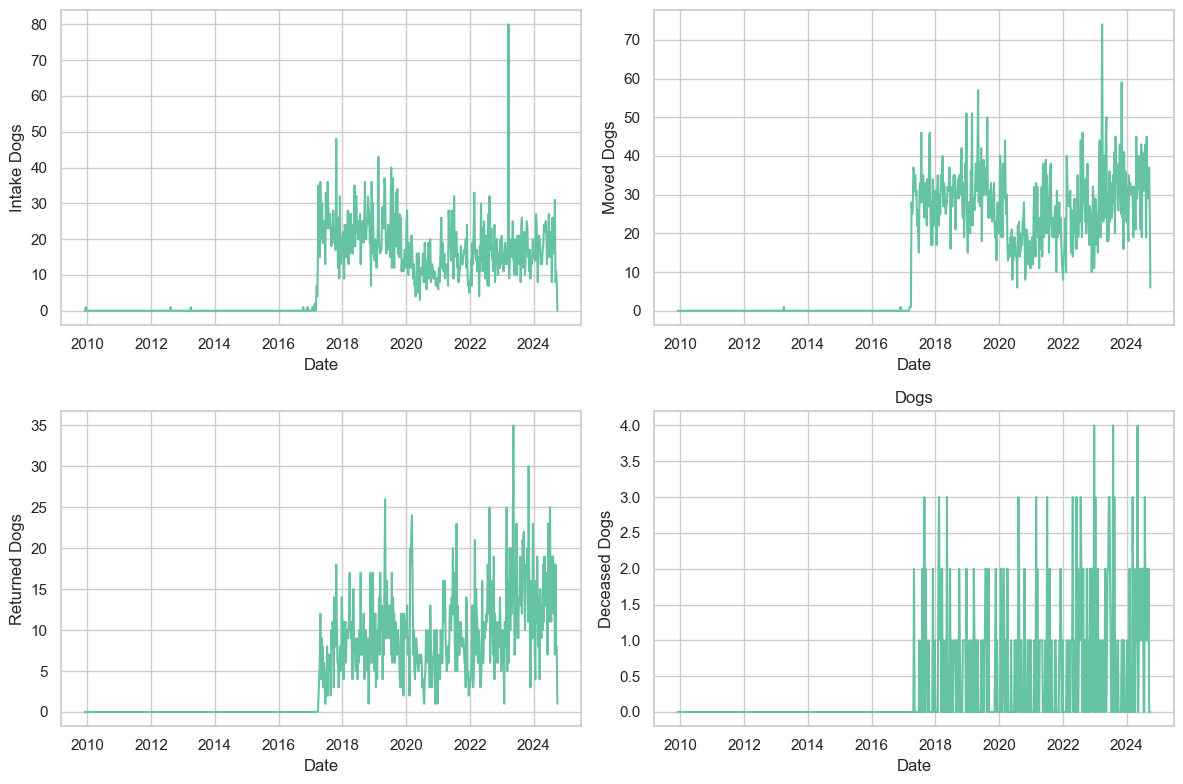

In [27]:
helper.plot_dog_categories(df_weekly)

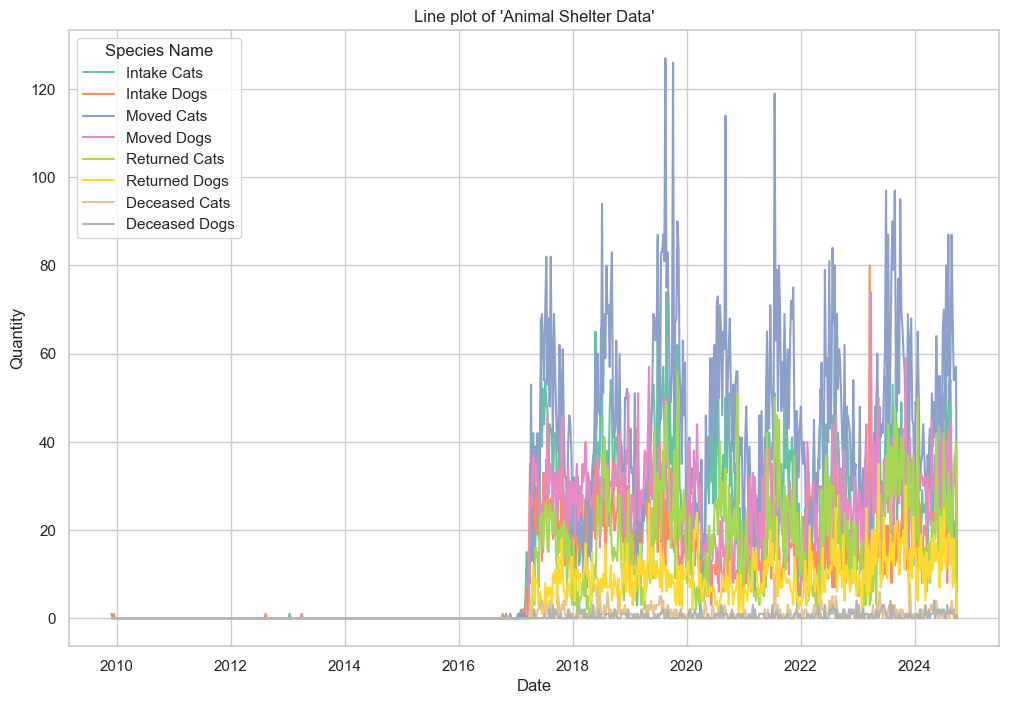

In [28]:
helper.plot_series(df_weekly, "Line plot of 'Animal Shelter Data'")

## Variación de los Datos

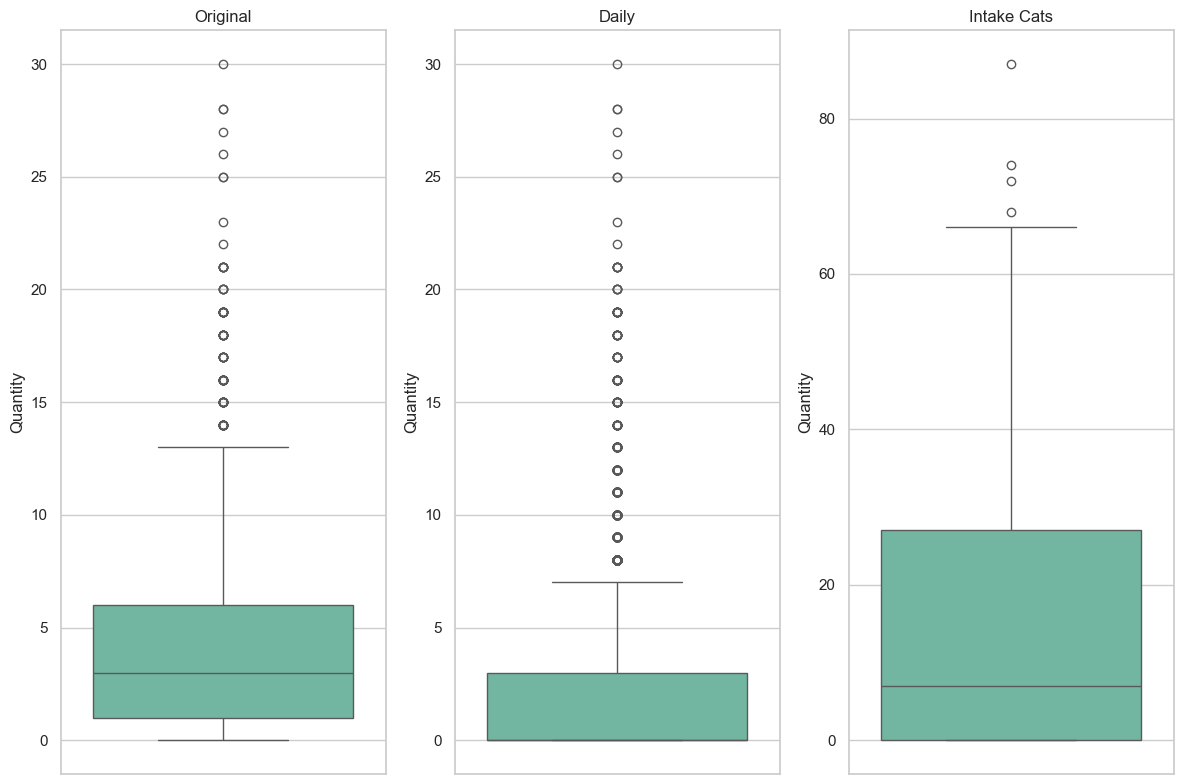

In [33]:
helper.compare_boxplots(df_grouped, df_daily, df_weekly, 'Intake Cats', 'Intake Cats')

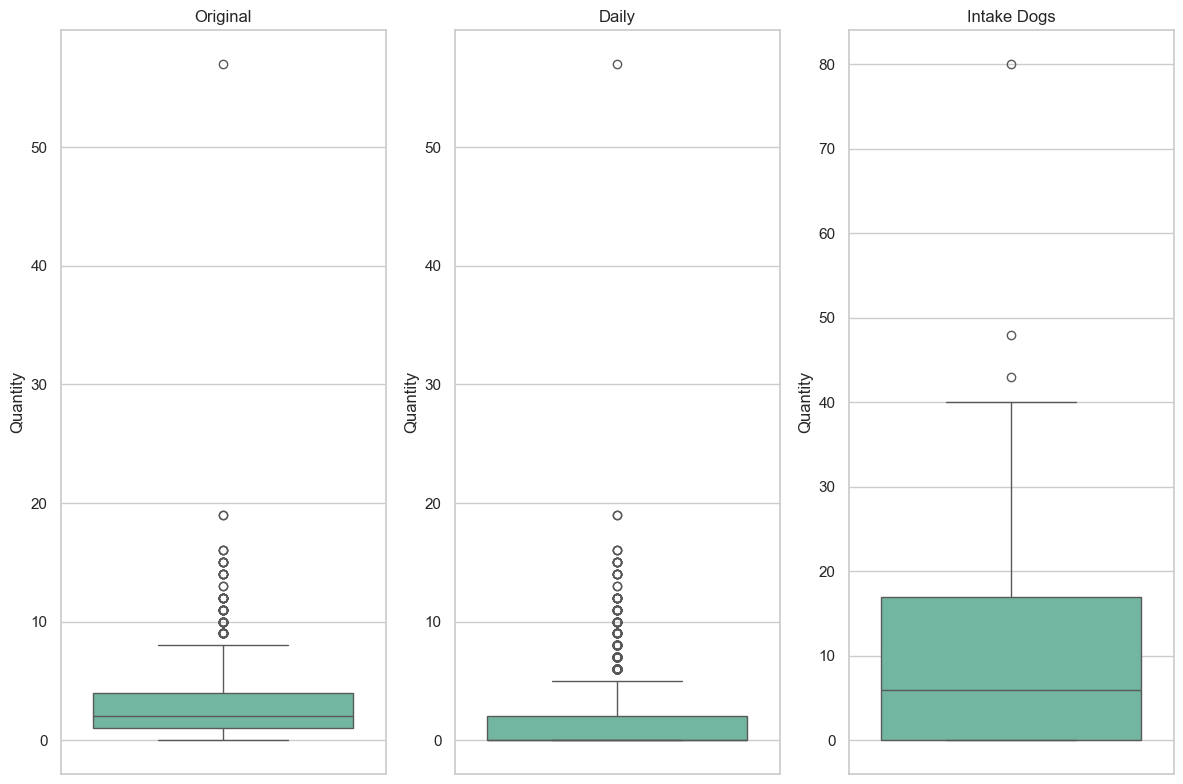

In [35]:
helper.compare_boxplots(df_grouped, df_daily, df_weekly, 'Intake Dogs', 'Intake Dogs')

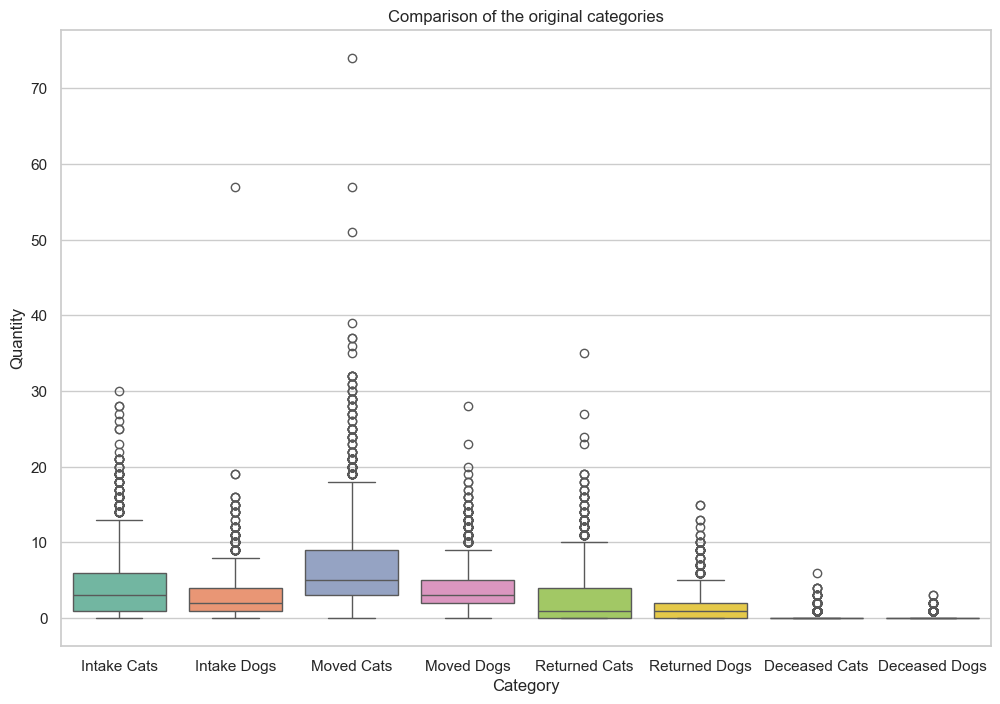

In [36]:
helper.boxplot(df_grouped, 'Comparison of the original categories')

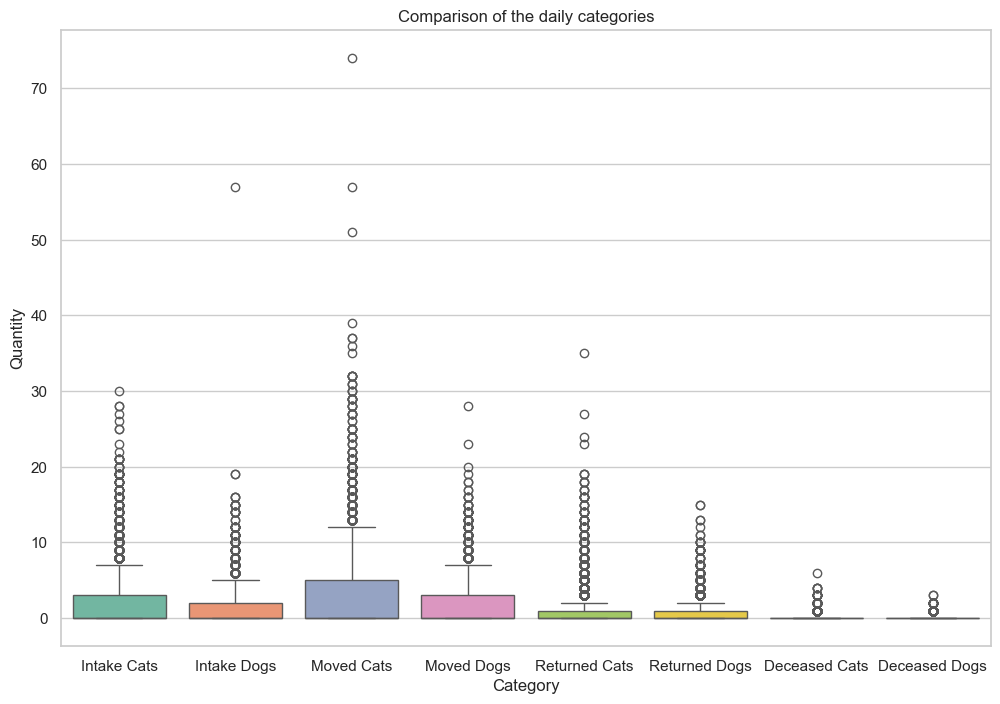

In [37]:
helper.boxplot(df_daily, 'Comparison of the daily categories')

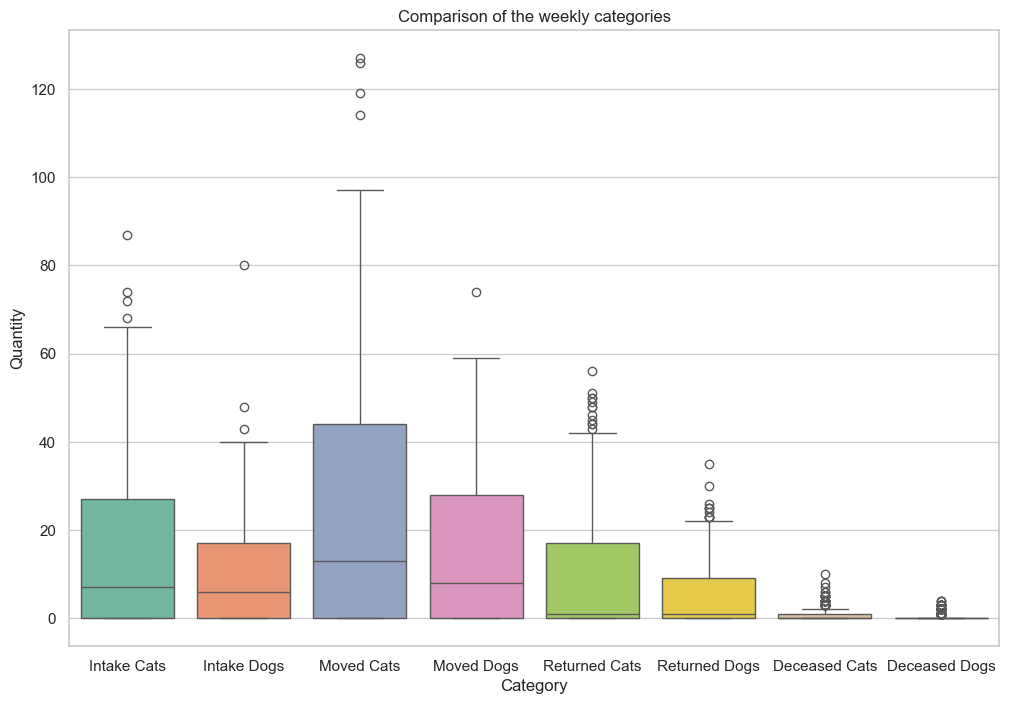

In [38]:
helper.boxplot(df_weekly, 'Comparison of the weekly categories')

# Preparación de Datos para predecir "Intake Cats"

In [51]:
# Eliminar los valores anteriores a 2017
df_daily_2017 = df_daily[df_daily.index >= '2017-01-01']
print("Cantidad de Filas: %d\nCantidad de Columnas: %d\n" % (df_daily_2017.shape[0], df_daily_2017.shape[1]))

Cantidad de Filas: 2823
Cantidad de Columnas: 8



In [52]:
# Definir el número de muestras de entrenamiento, validación y prueba

num_train_samples = int(0.8 * df_daily_2017.shape[0])
num_val_samples = int(0.1 * df_daily_2017.shape[0])
num_test_samples = df_daily_2017.shape[0] - num_train_samples - num_val_samples

print("Train Samples: %d\nValidation Samples: %d\nTest Samples: %d\n" % (num_train_samples, num_val_samples, num_test_samples))

Train Samples: 2258
Validation Samples: 282
Test Samples: 283



In [56]:
data = df_daily_2017[['Intake Dogs', 'Moved Cats', 'Moved Dogs', 'Returned Cats', 'Returned Dogs', 'Deceased Cats', 'Deceased Dogs']].values
intake_cats = df_daily_2017['Intake Cats'].values

# separar los datos en entrenamiento, validación y prueba
x_train = data[:num_train_samples]
y_train = intake_cats[:num_train_samples]
x_val = data[num_train_samples:num_train_samples + num_val_samples]
y_val = intake_cats[num_train_samples:num_train_samples + num_val_samples]
x_test = data[-num_test_samples:]
y_test = intake_cats[-num_test_samples:]

In [57]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [59]:
sequence_length = 30
sampling_rate = 1
delay = 7
batch_size = 32

train_dataset = timeseries_dataset_from_array(
	x_train_scaled[:-delay],
	targets = y_train[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,  # why?
	batch_size = batch_size
)

val_dataset = timeseries_dataset_from_array(
	x_val_scaled[:-delay],
	targets = y_val[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

test_dataset = timeseries_dataset_from_array(
	x_test_scaled[:-delay],
	targets = y_test[delay:],
	sampling_rate = sampling_rate,
	sequence_length = sequence_length,
	shuffle = True,
	batch_size = batch_size
)

In [67]:
def simple_rnn_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.SimpleRNN(32, return_sequences=True),
		tf.keras.layers.SimpleRNN(32),
		tf.keras.layers.Dense(1)
	])
	
	model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
	return model

def lstm_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.LSTM(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
	return model

def gru_model(input_shape: tuple):
	model = tf.keras.models.Sequential([
		tf.keras.Input(shape=input_shape),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2, return_sequences=True),
		tf.keras.layers.GRU(32, recurrent_dropout=0.2),
		tf.keras.layers.Dropout(0.2),
		tf.keras.layers.Dense(1)
	])
	model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
	return model

In [68]:
input_shape = (sequence_length, x_train.shape[-1])
print("Input Shape: %s" % str(input_shape))


Input Shape: (30, 7)


In [69]:
simple_rnn_model = simple_rnn_model(input_shape)
simple_rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 30, 32)         │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
callbacks = [
	tf.keras.callbacks.ModelCheckpoint('best_rnn.keras', save_best_only=True)
]

In [71]:
rnn_history = simple_rnn_model.fit(
	train_dataset,
	epochs=50,
	validation_data=val_dataset,
	callbacks=callbacks
)

Epoch 1/50
65/70 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.3347 - mean_squared_error: 21.3347

FailedPreconditionError: {{function_node __wrapped__CreateSummaryFileWriter_device_/job:localhost/replica:0/task:0/device:CPU:0}} logs/rnn is not a directory [Op:CreateSummaryFileWriter] name: 